# Linear Kernel

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
print (iris.data[:5])
print (iris.target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [3]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [4]:
X = iris.data[:, 2:] # petal length and width
y = iris.target

In [5]:
print (X[:5])
print (y[:5])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]
[0 0 0 0 0]


In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 1, 
                                                    stratify = y)

print ('labels count in y:', np.bincount(y))
print ('labels count in y_train:', np.bincount(y_train))
print ('labels count in y_test:', np.bincount(y_test))

labels count in y: [50 50 50]
labels count in y_train: [35 35 35]
labels count in y_test: [15 15 15]


In [7]:
# Standardize the features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [9]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

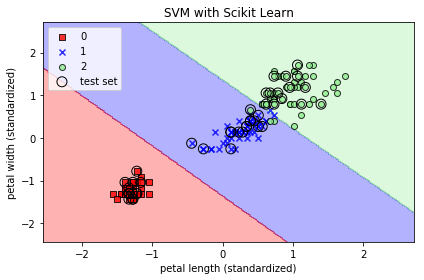

In [12]:
svm = SVC(kernel = 'linear', C = 1.0, random_state = 1) # cost - penalize the missclassification

svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                     y_combined,
                     classifier = svm,
                     test_idx = range(105,150))

plt.title('SVM with Scikit Learn')
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# Kernel Trick

In [13]:
np.random.seed(1)
X_xor = np.random.randn(200,2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

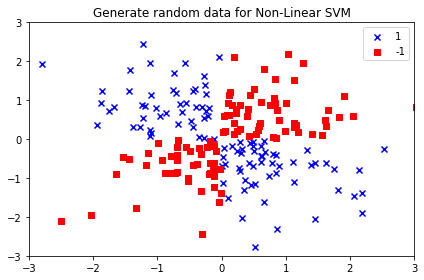

In [14]:
plt.scatter(X_xor[y_xor == 1, 0],
           X_xor[y_xor == 1, 1],
           c = 'b', marker = 'x',
           label = '1')

plt.scatter(X_xor[y_xor == -1, 0],
           X_xor[y_xor == -1, 1],
           c = 'r', marker = 's',
           label = '-1')

plt.title('Generate random data for Non-Linear SVM')

plt.xlim([-3, 3])
plt.ylim([-3,3])
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

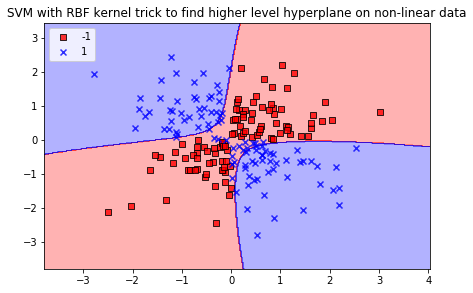

In [20]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 0.1, C = 10.0)

svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier = svm)

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.title('SVM with RBF kernel trick to find higher level hyperplane on non-linear data')
plt.show()

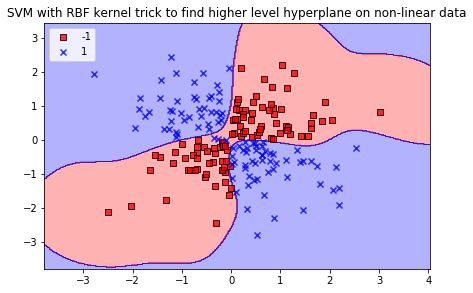

In [24]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 1, C = 10.0) # as we increase gamma - we increase no. of support vectors

svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier = svm)

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.title('SVM with RBF kernel trick to find higher level hyperplane on non-linear data')
plt.show()

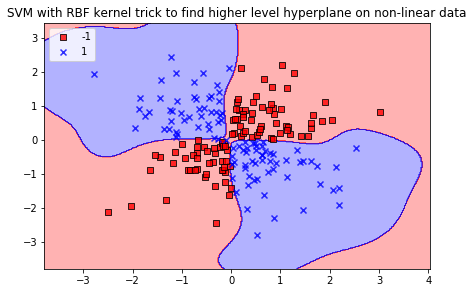

In [26]:
svm = SVC(kernel = 'rbf', random_state = 1, gamma = 1, C = 100.0) # example of an overfitted

svm.fit(X_xor, y_xor)

plot_decision_regions(X_xor, y_xor, classifier = svm)

plt.legend(loc = 'upper left')
plt.tight_layout()
plt.title('SVM with RBF kernel trick to find higher level hyperplane on non-linear data')
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X_xor, y_xor, test_size = 0.3, random_state = 1)

svm = SVC(kernel='rbf', random_state=1, gamma=1, C=100.0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))

Accuracy Score:
0.9666666666666667


In [29]:
X_train, X_test, y_train, y_test = train_test_split( X_xor, y_xor, test_size = 0.3, random_state = 1)

svm = SVC(kernel='rbf', random_state=1, gamma=0.1, C=10.0)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy Score:')
print(accuracy_score(y_test,y_pred))

Accuracy Score:
0.8666666666666667
